# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [ ]:
data

In [3]:
x_train = data[0] # 2차원
y_train = data[1] # 1차원

n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS

In [ ]:
# hypothesis = x_train * w1 + w0
# cost = np.sum((y_train - hypothesis)**2) / n_data

## Weight 초기화

In [6]:
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.02880301] [0.98557452]


## y_pred 계산

In [7]:
y_pred = x_train * w1 + w0

In [11]:
x_train[0] * w1 + w0 # 0번째 데이터에 대한 예측 값

array([0.95890781])

In [12]:
(x_train * w1 + w0)[:5]

array([[0.95890781],
       [1.05119569],
       [0.98095762],
       [1.02879219],
       [0.9842851 ]])

In [13]:
y_pred.shape # 2차원

(1000, 1)

In [15]:
y_train.shape # 1차원

(1000,)

## cost 계산

 - cost = np.sum((y_train - y_pred) ** 2) / n_data

In [21]:
# broadcast때문에 1차원, 1차원 빼기로 reshape해줌 y_pred을
(y_train - y_pred.reshape(-1))[:5]

array([ 847.27044863, 1007.17889186, 1050.92880658,  946.95515025,
        982.34315092])

In [22]:
cost = np.sum((y_train - y_pred.reshape(-1)) ** 2) / n_data

In [23]:
cost

1005004.4301010816

## Weight 업데이트

 - w1 -= (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 -= (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [33]:
np.sum(x_train * (y_train-y_pred.reshape(-1)).reshape(-1, 1) ) * 2 / n_data

58.7738599068101

In [34]:
np.dot((y_train - y_pred.reshape(-1)), x_train) * 2 / n_data

array([58.77385991])

In [36]:
w1 -= 0.01 * (-1) * np.dot((y_train - y_pred.reshape(-1)), x_train) * 2 / n_data

In [37]:
w0 -= (0.01) * (-1) * np.sum(y_train - y_pred.reshape(-1)) * 2 / n_data

In [38]:
w1, w0

(array([0.61654161]), array([21.00343499]))

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output 
    - clear_output()

In [39]:
epochs = 1000
learning_rate = 0.01

In [40]:
cost_list = []
for epoch in range(epochs):
    y_pred = x_train * w1 + w0
    cost = np.sum((y_train - y_pred.reshape(-1)) ** 2) / n_data
    
    cost_list.append(cost)

    w1 -= learning_rate * (-1) * np.dot((y_train - y_pred.reshape(-1)), x_train) * 2 / n_data
    w0 -= learning_rate * (-1) * np.sum(y_train - y_pred.reshape(-1)) * 2 / n_data

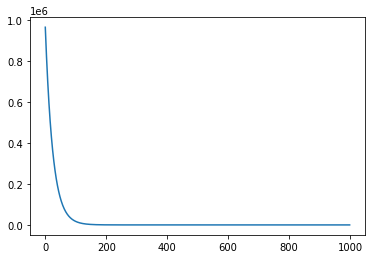

In [41]:
plt.plot(cost_list)

In [45]:
cost_list[0]

965299.4999311267

In [43]:
cost_list[-1]

2420.0370745195773

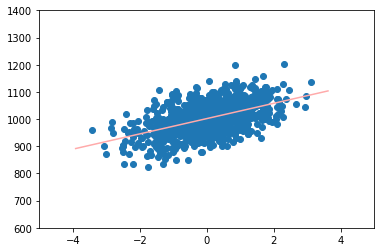

In [49]:
plt.scatter(x_train, y_train)
plt.xlim(-5, 5)
plt.ylim(600, 1400)

graph_x = np.linspace(x_train.min()-0.5, x_train.max()+0.5, 2)
graph_y = graph_x * w1 + w0

plt.plot(graph_x, graph_y, color='#faa')
plt.show()

# multi feature


In [52]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 100, bias = 1000, noise = 50) 

x_train = data[0] # 2차원
y_train = data[1] # 1차원

n_data = len(x_train)
n_feature = len(x_train[0])
print(n_data, n_feature, x_train.shape, y_train.shape)

1000 100 (1000, 100) (1000,)


In [61]:
w1 = np.random.rand(n_feature)
w0 = np.random.rand(1)
print(w1, w0)

[0.16367033 0.61925095 0.94865833 0.32762544 0.51177303 0.78181148
 0.19395787 0.19825657 0.14835345 0.21442584 0.87431552 0.54008704
 0.78073003 0.7527344  0.21823505 0.95980086 0.02111302 0.95220241
 0.93870046 0.88974222 0.39013455 0.29170444 0.83636479 0.9583356
 0.67624928 0.31062432 0.67531788 0.45105753 0.93037893 0.33083839
 0.04929627 0.69481779 0.31238802 0.46806754 0.83136992 0.13469786
 0.9554484  0.04781576 0.56726413 0.14562346 0.94521624 0.27496149
 0.50508228 0.60904559 0.48439954 0.91482592 0.95121459 0.86954001
 0.84662312 0.33600107 0.77671466 0.45332623 0.70784025 0.53177273
 0.55390452 0.28530774 0.72734292 0.99763325 0.86657405 0.61109645
 0.00529788 0.14078031 0.98362312 0.03801551 0.33042568 0.87389182
 0.70760049 0.16040447 0.72048662 0.12404611 0.27442287 0.21525086
 0.3742066  0.15807051 0.90629593 0.22857689 0.63098221 0.81994924
 0.2224633  0.04033295 0.85170345 0.88412582 0.37845823 0.27081019
 0.90303825 0.78544116 0.9270739  0.35008396 0.71318089 0.30060

In [62]:
y_pred = np.dot(x_train, w1) + w0

In [60]:
y_pred.shape

(1000,)

In [66]:
epochs = 1000
learning_rate = 0.01

cost_list = []
for epoch in range(epochs):
    y_pred = np.dot(x_train, w1) + w0
    cost = np.sum((y_train - y_pred.reshape(-1)) ** 2) / n_data
    
    cost_list.append(cost)

    w1 -= learning_rate * (-1) * np.dot((y_train - y_pred.reshape(-1)), x_train) * 2 / n_data
    w0 -= learning_rate * (-1) * np.sum(y_train - y_pred.reshape(-1)) * 2 / n_data

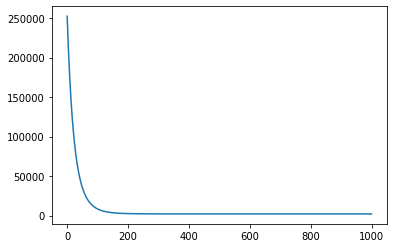

In [67]:
plt.plot(cost_list)

In [69]:
cost_list[-1]

2177.6184769531433